In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Rem-2021-12.csv')

In [3]:
df.head(9)


,Incident ID,Summary,Submitter,Submit Date,Company,Service Type,Reported Source
0,INC000002680684,Request - CMDB Update - reactivate monitoring ...,ragayc,3/15/2021,Vodafone NZ Ltd,User Service Request,Email
1,INC000002680685,Request - DMZRemote - Renew RSA Token for Lest...,baynec,3/16/2021,DMZ VFNZ,User Service Request,Email
2,INC000002680686,Request - DMZRemote - Renew RSA HARD Token for...,baynec,3/16/2021,DMZ VFNZ,User Service Request,Email
3,INC000002680687,Request - DMZRemote - Renew RSA Token for Andr...,baynec,3/16/2021,DMZ VFNZ,User Service Request,Email
4,INC000002680688,Request - DMZRemote - Renew RSA Token for Gran...,baynec,3/16/2021,DMZ VFNZ,User Service Request,Email
5,INC000002680689,Request - DMZRemote - Renew RSA Token for Mela...,baynec,3/16/2021,DMZ VFNZ,User Service Request,Email
6,INC000002680690,Request - DMZRemote - Renew RSA Token for Hayl...,baynec,3/16/2021,DMZ VFNZ,User Service Request,Email
7,INC000002680691,Request - DMZRemote - Renew RSA Token for Hadl...,baynec,3/16/2021,DMZ VFNZ,User Service Request,Email
8,INC000002680692,Request - DMZRemote - Renew RSA Token for Ray ...,baynec,3/16/2021,Vodafone NZ Ltd,User Service Request,Email


<AxesSubplot:xlabel='Reported Source', ylabel='count'>

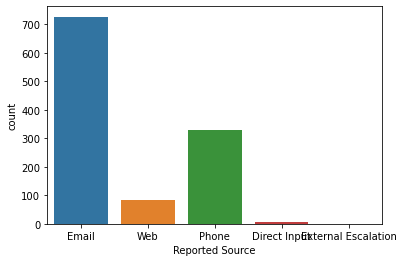

In [4]:
sns.countplot(x= "Reported Source", data= df);

In [5]:
csv_sample_file = (
    "C:/Users/rsamson/OneDrive - Vodafone Group/Documents/Flatfiles/Sample/recent-grads.csv"
)

In [6]:
df2 = pd.read_csv(csv_sample_file)
median_column = df2["Median"]

In [7]:
type(df2)

pandas.core.frame.DataFrame

In [8]:
pd.set_option("display.max.columns", None)

In [22]:
df2.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [10]:
%matplotlib inline

<AxesSubplot:xlabel='Rank'>

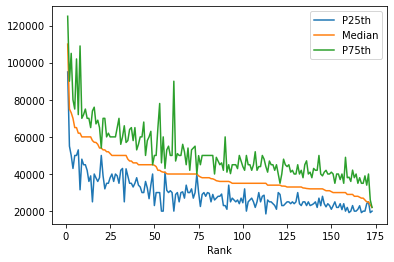

In [11]:
df2.plot(x="Rank", y=["P25th", "Median", "P75th"])

<AxesSubplot:ylabel='Frequency'>

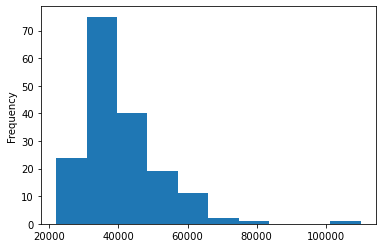

In [12]:
median_column.plot(kind="hist")

In [13]:
top_5 = df2.sort_values(by="Median", ascending=False).head(5)

<AxesSubplot:xlabel='Major'>

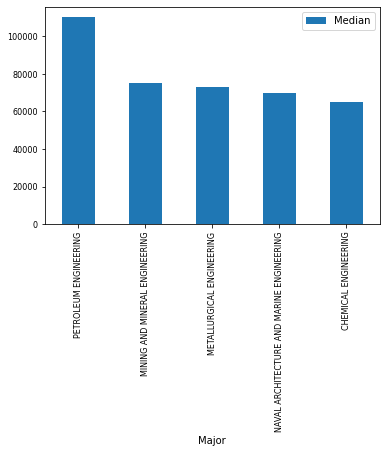

In [14]:
top_5.plot(x="Major", y="Median", kind="bar", fontsize=8)

In [15]:
top_medians = df2[df2["Median"] > 60000].sort_values("Median")

<AxesSubplot:xlabel='Major'>

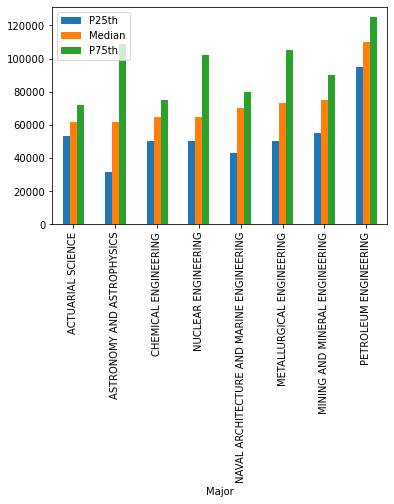

In [78]:
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

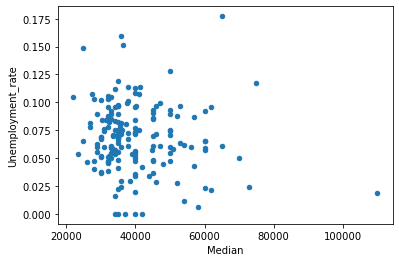

In [17]:
df2.plot(x="Median", y="Unemployment_rate", kind="scatter")

In [23]:
cat_totals = df2.groupby("Major_category")["Total"].sum().sort_values()

In [24]:
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

<AxesSubplot:ylabel='Major_category'>

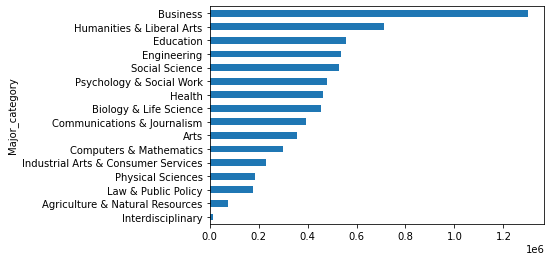

In [25]:
cat_totals.plot(kind="barh")

In [30]:
small_cat_totals = cat_totals[cat_totals < 100_000]

In [31]:
big_cat_totals = cat_totals[cat_totals > 100_000]

In [32]:
# Adding new item "Other" for the small category

In [33]:
small_sums = pd.Series([small_cat_totals.sum()],index=["Other"])

In [34]:
small_sums

Other    87916.0
dtype: float64

In [35]:
big_cat_totals = big_cat_totals.append(small_sums)

<AxesSubplot:>

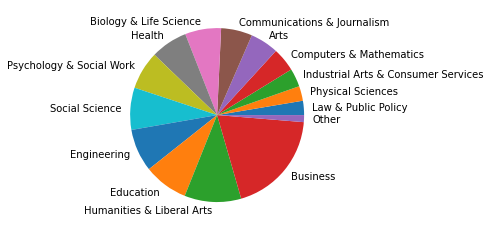

In [37]:
big_cat_totals.plot(kind="pie", label="")

<AxesSubplot:ylabel='Frequency'>

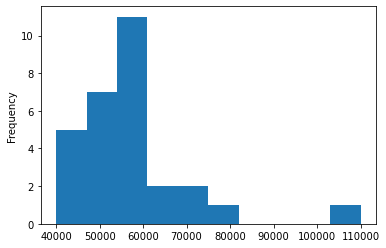

In [45]:
df2[df2["Major_category"] == "Engineering"]["Median"].plot(kind="hist")

In [62]:
engineer_category = df2[(df2.Major_category == "Engineering") & (df2.Median > 100_000)]

In [63]:
engineer_category.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193


<AxesSubplot:xlabel='Major'>

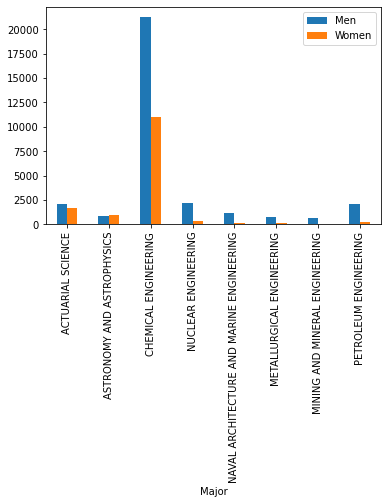

In [79]:
top_medians.plot(x="Major", y=["Men", "Women"], kind="bar")